# Simple Football Analyst

## Initialization

In [117]:
#import the needed lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
import seaborn as sns
import matplotlib.patheffects as pe

#import lib
from visualization import pitch

## Call the data

In [2]:
#call the data using pandas

df = pd.read_csv('./data/player-analyst/england-usa.csv')
df.head()

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,England,19,Pass,0,5,50,52,29,58
1,England,5,Pass,0,7,26,66,26,34
2,England,6,Pass,0,10,26,22,26,60
3,England,5,Pass,0,10,30,51,25,33
4,England,6,Pass,0,10,23,29,22,53


In [3]:
df.describe()

,Player,Mins,Secs,X,Y,X2,Y2
count,316.000000,316.0,316.000000,316.000000,316.000000,316.000000,316.000000
mean,8.689873,0.0,10.936709,44.373418,46.981013,48.854430,46.598101
std,6.208445,0.0,0.439098,21.376440,25.593395,22.865605,26.378560
min,1.000000,0.0,5.000000,4.000000,3.000000,5.000000,1.000000
25%,4.000000,0.0,11.000000,27.000000,26.000000,30.000000,23.750000
50%,6.000000,0.0,11.000000,40.000000,50.000000,44.000000,48.000000
75%,12.000000,0.0,11.000000,60.250000,65.000000,67.250000,67.250000
max,22.000000,0.0,11.000000,96.000000,93.000000,99.000000,94.000000


In [4]:
#normalization the X and Y data
df['X'] = df['X']*1.2
df['Y'] = df['Y']*0.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*0.8

In [5]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,England,19,Pass,0,5,60.0,41.6,34.8,46.4
1,England,5,Pass,0,7,31.2,52.8,31.2,27.2
2,England,6,Pass,0,10,31.2,17.6,31.2,48.0
3,England,5,Pass,0,10,36.0,40.8,30.0,26.4
4,England,6,Pass,0,10,27.6,23.2,26.4,42.4
...,...,...,...,...,...,...,...,...,...
311,England,5,Pass,0,11,36.0,31.2,51.6,23.2
312,England,22,Pass,0,11,63.6,21.6,75.6,8.8
313,England,3,Pass,0,11,76.8,12.0,84.0,23.2
314,England,10,Pass,0,11,84.0,21.6,100.8,30.4


In [6]:
#this is for maping pass web. We need passer and recipient
df["Passer"] = df["Player"]
df["Recipient"] = df["Player"].shift(-1)

#create new dataframe which just contains pass data
passes = df[df["Event"]=="Pass"]

In [7]:
passes

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2,Passer,Recipient
0,England,19,Pass,0,5,60.0,41.6,34.8,46.4,19,5.0
1,England,5,Pass,0,7,31.2,52.8,31.2,27.2,5,6.0
2,England,6,Pass,0,10,31.2,17.6,31.2,48.0,6,5.0
3,England,5,Pass,0,10,36.0,40.8,30.0,26.4,5,6.0
4,England,6,Pass,0,10,27.6,23.2,26.4,42.4,6,5.0
...,...,...,...,...,...,...,...,...,...,...,...
310,England,9,Pass,0,11,50.4,20.0,34.8,28.8,9,5.0
311,England,5,Pass,0,11,36.0,31.2,51.6,23.2,5,22.0
312,England,22,Pass,0,11,63.6,21.6,75.6,8.8,22,3.0
313,England,3,Pass,0,11,76.8,12.0,84.0,23.2,3,10.0


In [13]:
passes.dtypes

Team          object
Player         int64
Event         object
Mins           int64
Secs           int64
X            float64
Y            float64
X2           float64
Y2           float64
Passer         int64
Recipient    float64
dtype: object

In [14]:
#we need to change the recipient as int
rec = pd.to_numeric(passes["Recipient"], downcast="integer")
passes["Recipient"] = rec

/tmp/ipykernel_6738/3591101790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes["Recipient"] = rec


In [15]:
passes.dtypes

Team          object
Player         int64
Event         object
Mins           int64
Secs           int64
X            float64
Y            float64
X2           float64
Y2           float64
Passer         int64
Recipient       int8
dtype: object

In [16]:
avg_location = passes.groupby("Passer").agg({"X":["mean"], "Y":["mean", "count"]})
avg_location.columns = ["X", "Y", "Count"]

In [63]:
avg_location

,X,Y,Count
Passer,,,
1,13.938462,38.646154,13
3,59.160000,9.546667,30
4,51.915789,32.421053,38
5,37.576471,46.352941,51
6,33.365854,26.692683,41
9,61.885714,50.971429,7
10,73.760000,23.893333,15
12,55.328571,61.171429,28
17,72.700000,59.666667,12


In [64]:
PlayerName = ["Pickford", "Shaw", "Rice", "Stones", "Maguire", "Kane", "Sterling", "Trippier", "Saka", "Mount", "Bellingham"]

avg_location["PlayerName"] = PlayerName
# avg_location.index = np.arange(0, len(avg_location))
avg_location

,X,Y,Count,PlayerName
Passer,,,,
1,13.938462,38.646154,13,Pickford
3,59.160000,9.546667,30,Shaw
4,51.915789,32.421053,38,Rice
5,37.576471,46.352941,51,Stones
6,33.365854,26.692683,41,Maguire
9,61.885714,50.971429,7,Kane
10,73.760000,23.893333,15,Sterling
12,55.328571,61.171429,28,Trippier
17,72.700000,59.666667,12,Saka


In [19]:
pass_between = passes.groupby(["Passer", "Recipient"]).count().reset_index()
pass_between.rename({"id":"Pass_Count"}, axis="columns", inplace=True)

pass_between = pass_between.merge(avg_location, left_on="Passer", right_index=True)
pass_between = pass_between.merge(avg_location, left_on="Recipient", right_index=True, suffixes=["","_end"])
pass_between

,Passer,Recipient,Team,Player,Event,Mins,Secs,X_x,Y_x,X2,Y2,X_y,Y_y,Count,X,Y,Count_end
0,1,3,1,1,1,1,1,1,1,1,1,13.938462,38.646154,13,59.16,9.546667,30
13,4,3,5,5,5,5,5,5,5,5,5,51.915789,32.421053,38,59.16,9.546667,30
22,5,3,5,5,5,5,5,5,5,5,5,37.576471,46.352941,51,59.16,9.546667,30
30,6,3,10,10,10,10,10,10,10,10,10,33.365854,26.692683,41,59.16,9.546667,30
38,9,3,1,1,1,1,1,1,1,1,1,61.885714,50.971429,7,59.16,9.546667,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,9,19,1,1,1,1,1,1,1,1,1,61.885714,50.971429,7,62.20,35.800000,12
50,10,19,1,1,1,1,1,1,1,1,1,73.760000,23.893333,15,62.20,35.800000,12
59,12,19,1,1,1,1,1,1,1,1,1,55.328571,61.171429,28,62.20,35.800000,12
66,17,19,1,1,1,1,1,1,1,1,1,72.700000,59.666667,12,62.20,35.800000,12


Text(0.5, 1.0, 'pass web between England player')

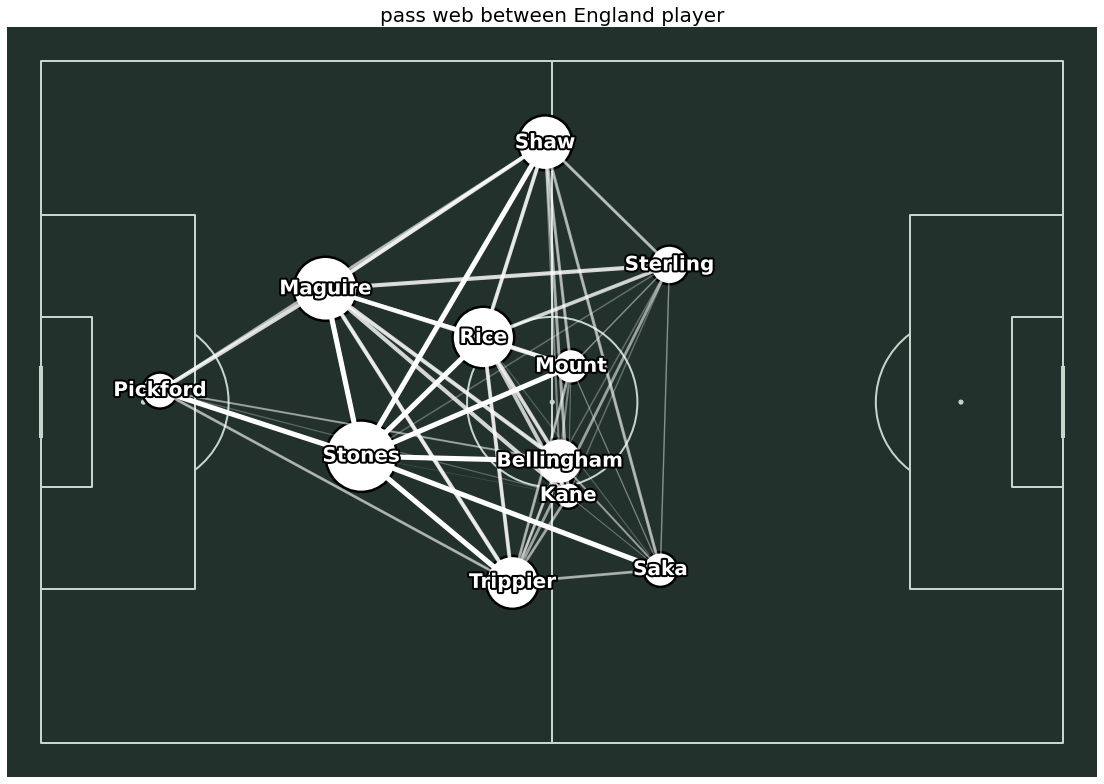

In [121]:
field = Pitch(pitch_type='statsbomb', half=False, pitch_length=120, pitch_width=80,
             pitch_color='#22312b', line_color='#c7d5cc')
fig,ax = field.draw(figsize=(16,11))
arrows = field.lines(pass_between.X, pass_between.Y, pass_between.X_y, pass_between.Y_y, ax=ax, 
                      lw=pass_between.Count*0.1, color="white", zorder = 4, alpha=pass_between.Count/pass_between.Count.max() )

nodes = field.scatter(avg_location.X, avg_location.Y, s=100*avg_location.Count, color="white", edgecolor="black",
                     linewidth=2.5, alpha=1, zorder=1, ax=ax)

for x, row in avg_location.iterrows():
    field.annotate(row.PlayerName, xy=(row.X, row.Y), color="white", va='center', ha='center', weight = "bold", 
                   size=20, ax=ax, wrap=True, zorder = 4,
                   path_effects=[pe.withStroke(linewidth=4, foreground="black")]
                  )

plt.title(label="pass web between England player", color="black", fontsize=20)

## Visualize the movement

### Jamal Musiala 

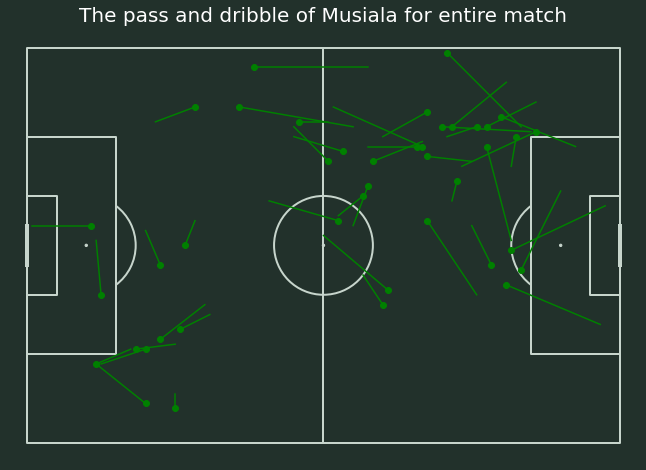

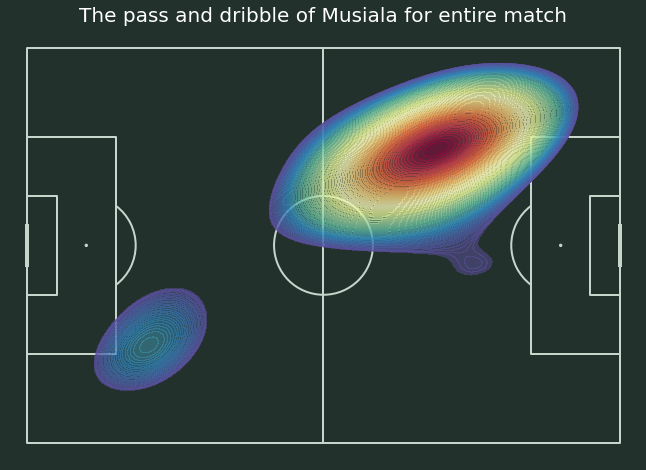

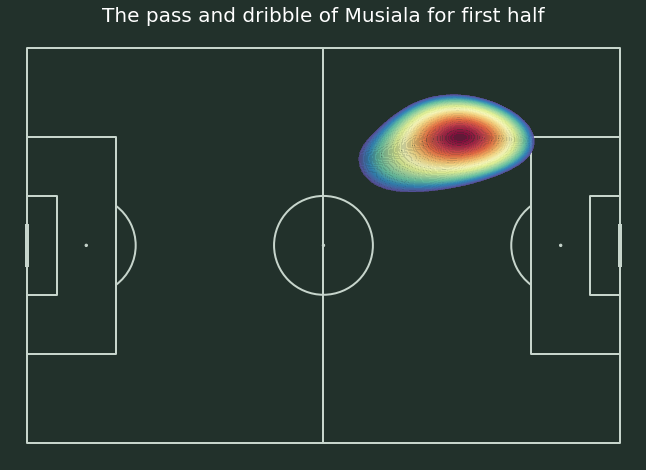

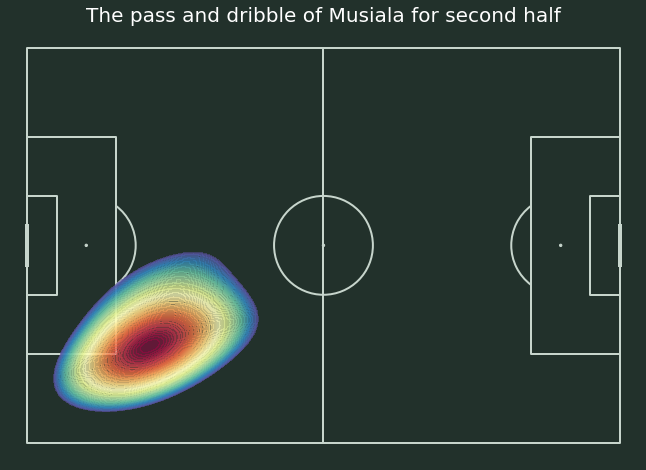

In [7]:
player = "Musiala"
pitch.passmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=45)
pitch.playerheatmap(df, player=player, time_start=45, time_ends=90)

## Muller

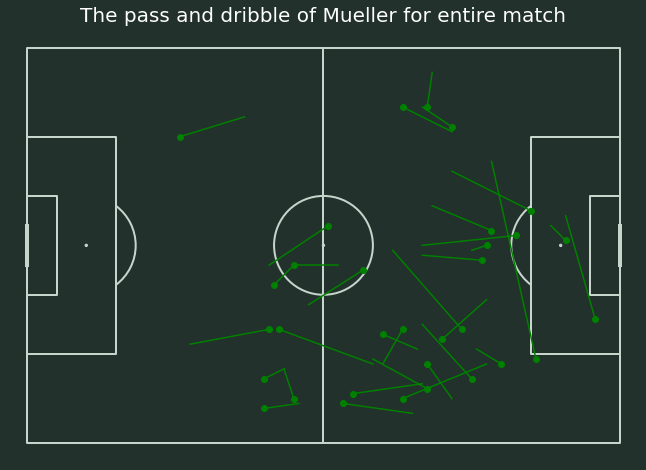

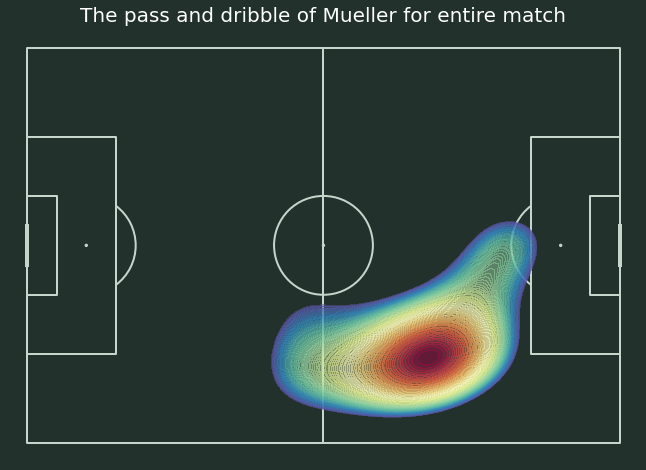

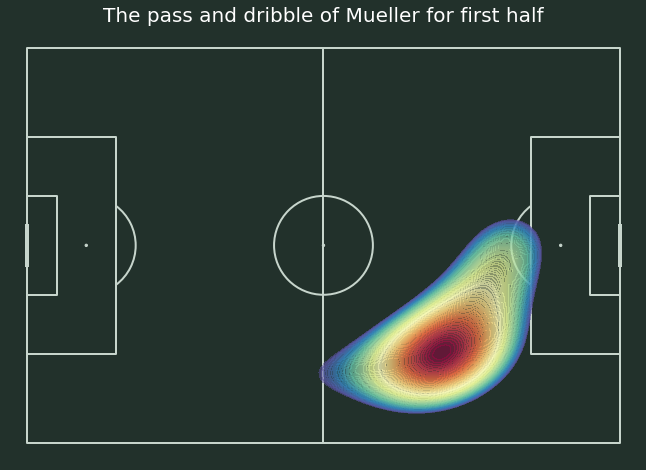

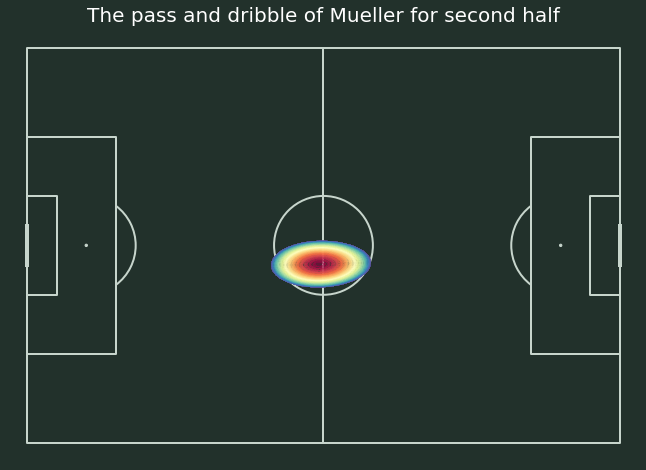

In [8]:
player = "Mueller"
pitch.passmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=45)
pitch.playerheatmap(df, player=player, time_start=45, time_ends=90)

## Kubo

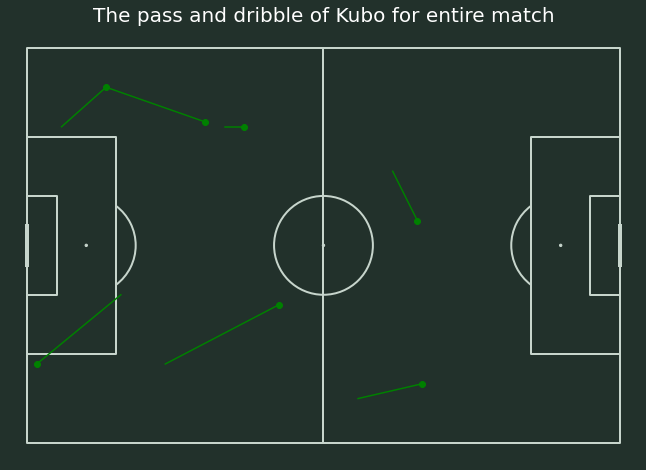

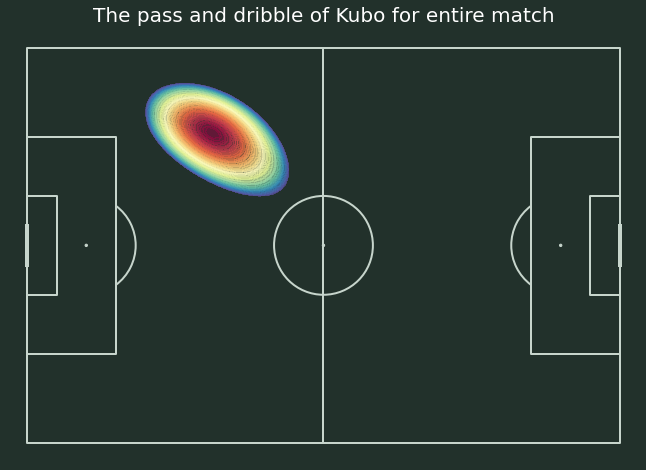

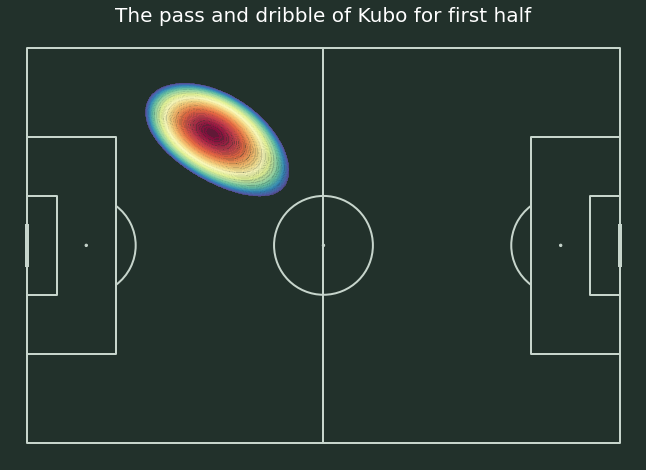

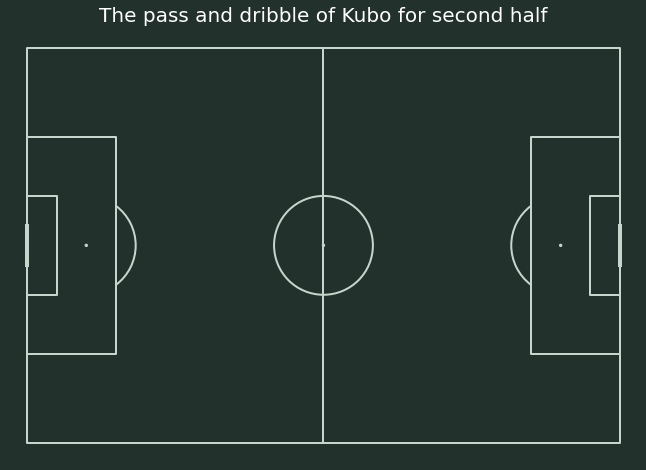

In [9]:
player = "Kubo"
pitch.passmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=45)
pitch.playerheatmap(df, player=player, time_start=45, time_ends=90)

## Tomiyasu 

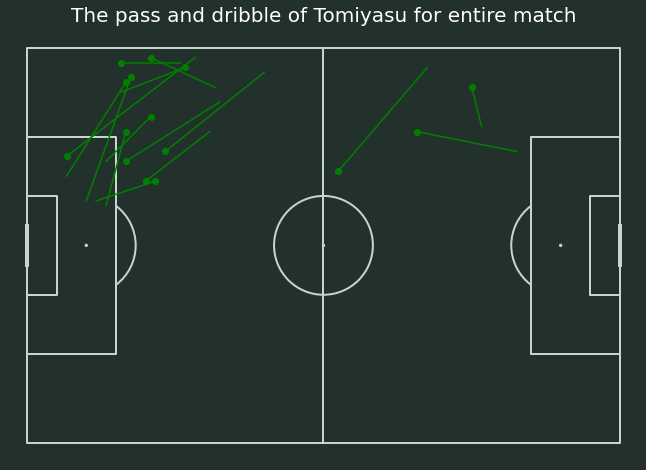

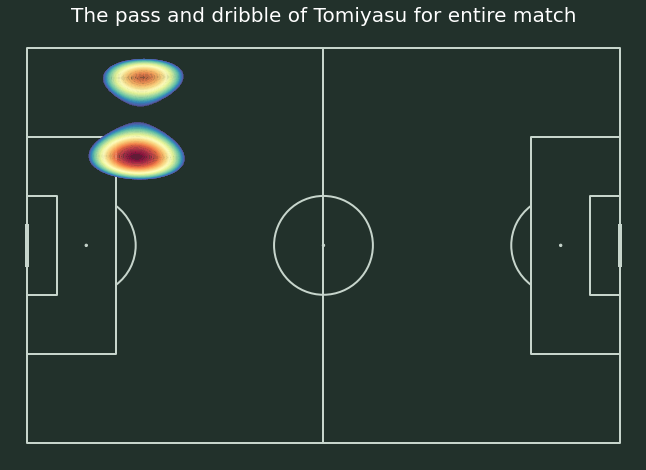

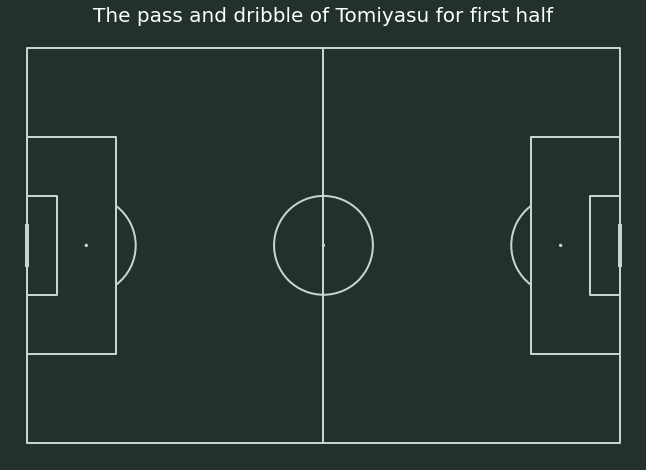

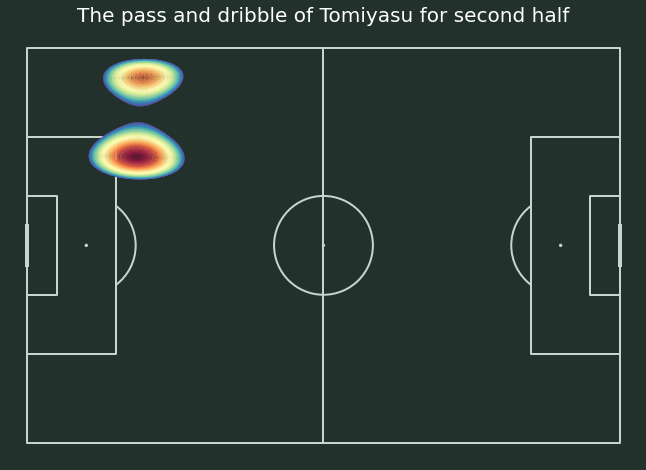

In [10]:
player = "Tomiyasu"
pitch.passmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=90)
pitch.playerheatmap(df, player=player, time_start=0, time_ends=45)
pitch.playerheatmap(df, player=player, time_start=45, time_ends=90)